Choose a datasets: 
 1 -> AMOCO_HN 
 2 -> provaADM1 
 3 -> bsm2 
 4 -> matlab
Data are from: amoco_HN
C:\Users\fede1\OneDrive - Politecnico di Milano\Documenti\GitHub\AD-OCS\Working_data
mu1,max: 0.3179441566590626; Ks1:  0.3934383020566712; Cd1: 0.07145038157763807
mu2,max: 0.1395227951114702; Ks2:  3.0523454127694714; KI2: 199.2865903880199; Cd2: 0.17302628019377272
k1: [18.89428158], intercept: 0.614474830334951
k2: [815.32471023], intercept: -5.079308170919209
k3: [956.2605334], intercept: -5.079308170919209
k4: [10.46146164], intercept: 0.0
k5: [191.38876052], intercept: 0.0
k6: [252.89930627], intercept: 0.7546849933824298
k_hyd: [5.00241138], intercept: -0.6685035332106093
kLa: [23.21029151],     intercept: 2.6833587136628143,

 STEADY STATE VALUES 

S.S. of XT   0.3166804680877583
S.S. of X1   1.149200718776252
S.S. of X2   0.9585206009329962
S.S. of Z    239.74788220447437
S.S. of S1   0.11666640593408327
S.S. of S2   3.5322754028707064
S.S. of C    241.59698721271675
S.S. of 

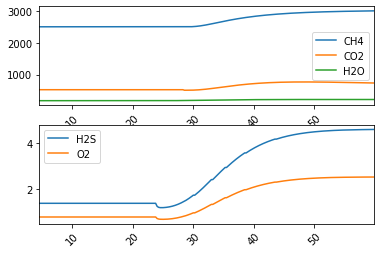

In [3]:
from main_6_3 import *
from functions import *

Oxygen Inhibition


In [9]:
# sol_O2 = np.exp(-171.2542 + 8391.24/(T+273.15) + 23.24323*np.log(T+273.15)) # [-]   - Mole fraction of dissolved oxygen in water at [T]°C (273 K-353 K)
# H_O2_atm = 1/sol_O2 # [atm] - Henry's constant oxygen at [T]°C - Partial Pressure Relation
n_o2 = digester_out['O2']
x_o2 = n_o2/(digester_out['CH4']+digester_out['CO2']+digester_out['H2S']+digester_out['O2']+digester_out['H2O']) #[-]
C_o2 =  x_o2* 1/Rgas_L_atm_K/(T+273.15) # [mol/L]
w_O2 = C_o2*0.032 # [mg/L]
I_O2 = 1/(1+w_O2/3.29)
Ch4_inh = digester_out['CH4']*I_O2

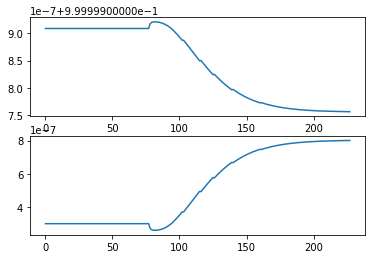

In [13]:
plt.subplot(2,1,1)
plt.plot(I_O2)
plt.subplot(2,1,2)
plt.plot(w_O2)

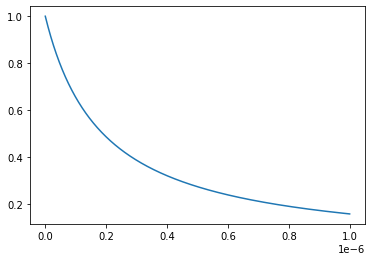

In [5]:
S_O = np.linspace(0, 1e-6, 1000)
I_O2 = 1/(1+S_O/1.9e-7)
plt.plot(S_O, I_O2)

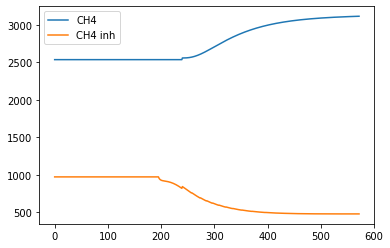

In [19]:
plt.plot(digester_out['CH4'], label='CH4')
plt.plot(Ch4_inh, label='CH4 inh')
plt.legend()

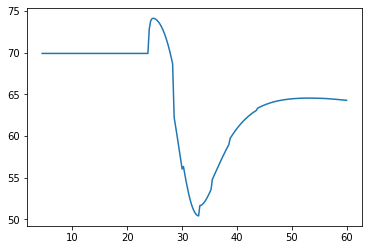

In [18]:
plt.plot(digester_out['t'], digester_out['efficiency'], label='efficiency')

In [17]:
digester_out.loc[digester_out['t_in']>24]

,t_in,t,CH4,CO2,H2S,H2O,O2,r_avg,efficiency
97,24.25,28.792092,2507.510429,505.500449,1.491754,182.963724,0.824427,8.791087,61.229984
98,24.50,29.036391,2508.032473,505.710303,1.532413,183.731841,0.846147,8.871333,60.201301
99,24.75,29.279774,2508.944329,506.140542,1.575274,184.508895,0.869093,8.963109,59.149124
100,25.00,29.521958,2510.369142,506.861010,1.620238,185.291684,0.893213,9.067465,58.090814
101,25.25,29.762753,2512.390471,507.919833,1.667197,186.077290,0.918452,9.185200,57.042706
...,...,...,...,...,...,...,...,...,...
223,55.75,58.944748,3009.934875,737.735059,4.581732,212.976730,2.507988,31.764461,64.330077
224,56.00,59.191556,3010.578934,736.785813,4.582555,212.959701,2.508244,31.772393,64.314221
225,56.25,59.438375,3011.209515,735.837630,4.583331,212.942560,2.508474,31.779783,64.297994
226,56.50,59.685205,3011.827113,734.891002,4.584063,212.925339,2.508678,31.786659,64.281407


IndexError: index 250 is out of bounds for axis 0 with size 241

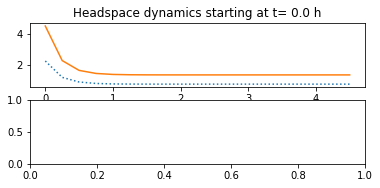

In [16]:
samples = [0,250,500]
for ind in range(len(samples)):
    plt.subplot(len(samples),1,ind+1)
    plt.title(('Headspace dynamics starting at t= %s h' % t_span[samples[ind]]))
    plt.plot(headspace_dict[ind]['t_cstr'],headspace_dict[ind]['H2S'], color = 'tab:orange')
    plt.plot(headspace_dict[ind]['t_cstr'],headspace_dict[ind]['O2'],':', color = 'tab:blue')
    ind+1
plt.subplots_adjust(hspace=0.7)